In [1]:
from glob import glob
import chess.pgn


for file in glob(f"round*/*.pgn"):
    print(file)

round1game1/games.pgn
round1game2/games.pgn
round1game3/games.pgn
round1game4/games.pgn
round1game5/games.pgn
round1game6/games.pgn
round1game7/games.pgn
round1game8/games.pgn
round2game1/games.pgn
round2game2/games.pgn
round2game3/games.pgn
round2game4/games.pgn
round2game5/games.pgn
round2game6/games.pgn
round2game7/games.pgn
round2game8/games.pgn
round2game9/games.pgn
round2game10/games.pgn
round2game11/games.pgn
round3game1/games.pgn
round3game2/games.pgn
round3game3/games.pgn
round3game4/games.pgn
round3game5/games.pgn
round3game6/games.pgn
round3game7/games.pgn
round3game8/games.pgn
round3game9/games.pgn
round3game10/games.pgn
round3game11/games.pgn
round4game1/games.pgn
round4game2/games.pgn
round4game3/games.pgn
round4game4/games.pgn
round4game5/games.pgn
round4game6/games.pgn
round4game7/games.pgn
round4game8/games.pgn
round4game9/games.pgn
round4game10/games.pgn
round4game11/games.pgn
round5game2/games.pgn
round5game1/games.pgn
round5game8/games.pgn
round5game7/games.pgn
roun

In [2]:
from bs4 import BeautifulSoup
handle = open("./World Cup Participants – FIDE World Cup 2025, Goa India, World Chess Cup.html", "r")
soup = BeautifulSoup(handle, "html.parser")
players = soup.select_one("table")
s = str(players)
open("./player_table.html", "w").write(s)

36629

In [3]:
import pandas as pd
df = pd.read_html("./player_table.html")[0]
df

,#,FIDE ID,Name,FED,Title,Rating*,B-Year
0,1,46616543,Gukesh D,IND,GM,2752,2006
1,2,35009192,Erigaisi Arjun,IND,GM,2773,2003
2,3,25059530,Praggnanandhaa R,IND,GM,2771,2005
3,4,24116068,"Giri, Anish",NED,GM,2759,1994
4,5,5202213,"So, Wesley",USA,GM,2756,1993
...,...,...,...,...,...,...,...
201,202,21518840,"Alrehaili, Ahmed Abdullah S",KSA,FM,2109,2000
202,203,15202020,"Ndahangwapo, Heskiel",NAM,CM,2093,2000
203,204,4304314,"Qin, Oscar Shu Xuan",NZL,CM,2078,2008
204,205,6006760,"Li, Yiheng",HKG,CM,1994,2012


In [4]:
import numpy as np
rating_average = {}
for fed, group in df.groupby(by="FED"):
    names = group["Name"].to_list()
    rating_average[fed] = (np.average(group["Rating*"].to_numpy()), names, len(names))
rating_average

{'ALG': (np.float64(2349.5), ['Bellahcene, Bilel', 'Boulrens, Ala Eddine'], 2),
 'ANG': (np.float64(2347.0), ['Silva, David'], 1),
 'ARG': (np.float64(2493.3333333333335),
  ['Flores, Diego', 'Oro, Faustino', 'Schnaider, Ilan'],
  3),
 'ARM': (np.float64(2606.2),
  ['Sargsyan, Shant',
   'Hovhannisyan, Robert',
   'Martirosyan, Haik M.',
   'Sargissian, Gabriel',
   'Grigoryan, Karen H.'],
  5),
 'AUS': (np.float64(2565.5), ['Cheng, Bobby', 'Kuybokarov, Temur'], 2),
 'AUT': (np.float64(2596.0), ['Alekseenko, Kirill', 'Blohberger, Felix'], 2),
 'AZE': (np.float64(2607.3333333333335),
  ['Mamedyarov, Shakhriyar',
   'Mamedov, Rauf',
   'Suleymanli, Aydin',
   'Abasov, Nijat',
   'Samadov, Read',
   'Ahmadzada, Ahmad'],
  6),
 'BAN': (np.float64(2392.5),
  ['Mohammad Fahad, Rahman', 'Manon, Reja Neer'],
  2),
 'BAR': (np.float64(2291.0), ['Husbands, Orlando'], 1),
 'BEL': (np.float64(2605.0), ['Dardha, Daniel'], 1),
 'BIH': (np.float64(2532.0), ['Maksimovic, Bojan'], 1),
 'BRA': (np.float

Text(0, 0.5, 'Average Rating')

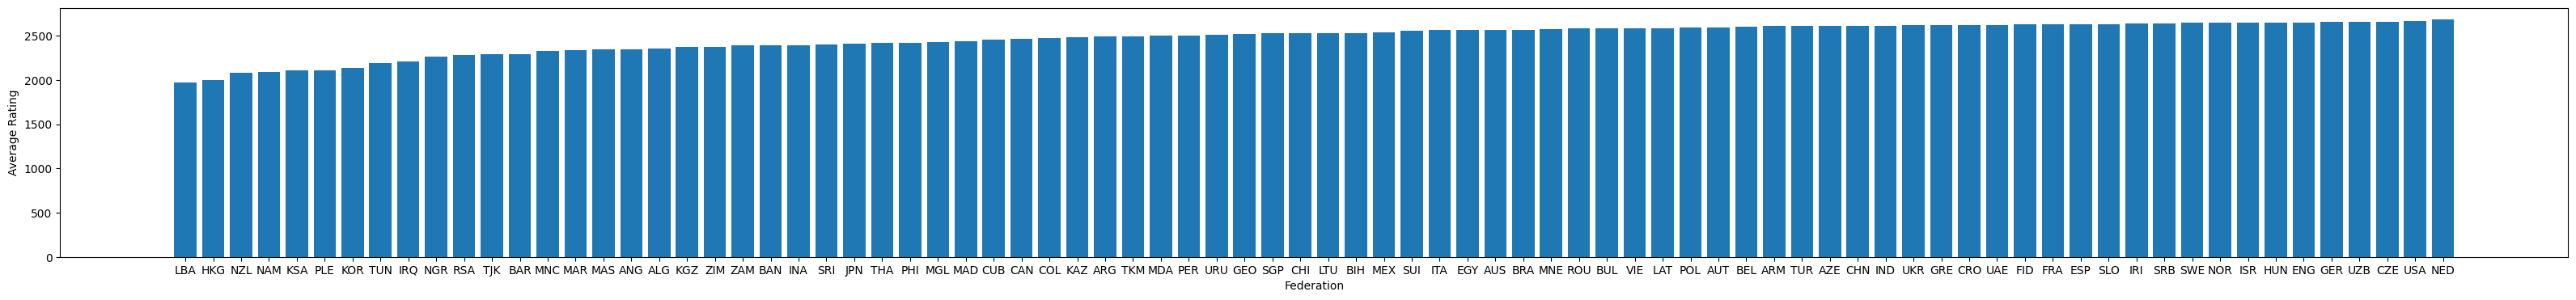

In [5]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
fig.set_size_inches(40, 4)
v = list(sorted(rating_average.keys(), key = lambda x: rating_average[x][0]))

ax.bar(v, [rating_average[key][0] for key in v])
ax.set_xlabel("Federation")
ax.set_ylabel("Average Rating")

In [6]:
# from chess import 
from chess.pgn import Game
pgn = open("round6game1/games.pgn")
l: list[Game] = []
while True:
    try:
        game = chess.pgn.read_game(pgn)
        if game is None: break
        l.append(game)
    except Exception as e:
        break
l

[<Game at 0x7f121f65b8c0 ('Sindarov, Javokhir' vs. 'Martinez Alcantara, Jose Eduardo', '2025.11.17' at 'Goa, India')>,
 <Game at 0x7f121ee12ad0 ('Wei, Yi' vs. 'Erigaisi, Arjun', '2025.11.17' at 'Goa, India')>,
 <Game at 0x7f121ee13b10 ('Shankland, Sam' vs. 'Esipenko, Andrey', '2025.11.17' at 'Goa, India')>,
 <Game at 0x7f121f81efd0 ('Yakubboev, Nodirbek' vs. 'Donchenko, Alexander', '2025.11.17' at 'Goa, India')>]

In [20]:
for game in l:
    print(dict(game.headers).get("White"))
    print(game.headers.get("Black"))
    print(game.headers.get("Result"))
    print("--")

Abugenda, Nagi
Erdogmus, Yagiz Kaan
0-1
--
Xiong, Jeffery
Li, Yiheng
1-0
--
Qin, Oscar Shu Xuan
Rodshtein, Maxim
0-1
--
Artemiev, Vladislav
Ndahangwapo, Heskiel
1-0
--
Alrehaili, Ahmed Abdullah S
Adams, Michael
0-1
--
Grandelius, Nils
Allam, Mohamed
1-0
--
Huh, Isaak
Martinez Alcantara, Jose Eduardo
0-1
--
Gledura, Benjamin
Amdouni, Zoubaier
1-0
--
Salih, Akar Ali Salih
Kollars, Dmitrij
0-1
--
Pranav, V
Boulrens, Ala Eddine
1-0
--
Kigigha, Bomo Lovet
Donchenko, Alexander
0-1
--
Sadhwani, Raunak
Barrish, Daniel
1/2-1/2
--
Ilkhomi, Jaloliddin
Vokhidov, Shamsiddin
0-1
--
Svane, Frederik
Husbands, Orlando
1-0
--
Efimov, Igor
Gurel, Ediz
0-1
--
Chigaev, Maksim
Elbilia, Jacques
1-0
--
Kavin, Mohan
Hovhannisyan, Robert
1/2-1/2
--
Anton Guijarro, David
Silva, David
1-0
--
Manon, Reja Neer
Tari, Aryan
1/2-1/2
--
Pranesh, M
Akhmedinov, Satbek
1-0
--
Mandizha, Farai
Amin, Bassem
0-1
--
Ivic, Velimir
Orozbaev, Eldiyar
1-0
--
Mwali, Chitumbo
Bacrot, Etienne
0-1
--
Cheparinov, Ivan
Cordoba Roa, Ange

In [23]:
from chess.pgn import Game
l: list[Game] = []
errors = []
for file in glob("round*/*.pgn"):
    with open(file, encoding="utf-8") as pgn:
        round_game, _ = file.split("/")
        while True:
            try: 
                game = chess.pgn.read_game(pgn)
                if game is None: break
                l.append(game)
                if len(game.errors) > 0:
                    errors.append({
                        "header": dict(game.headers), 
                        "error": [err for err in game.errors],
                        # format is roundXgameY
                        "at": (round_game[:6], round_game[6:])
                        })
                
            except Exception as e: break
# get errors:



errors

illegal san: 'Ke4' in R7/6kp/3b4/5p2/1p3K2/1P1p1N1P/P2P1r2/8 w - - 8 44 while parsing <Game at 0x7f1208492600 ('Lodici, Lorenzo' vs. 'Niemann, Hans Moke', '2025.11.04' at 'Goa, India')>
illegal san: 'Ke4' in 8/8/4p3/4k3/8/5K2/8/8 w - - 0 99 while parsing <Game at 0x7f12172dc170 ('Tari, Aryan' vs. 'Pranav, V', '2025.11.06' at 'Goa, India')>
illegal san: 'Kc7' in 1k3r2/6Q1/pp2p3/4qN2/P3Bn2/4RP2/1P4P1/5K2 b - - 5 52 while parsing <Game at 0x7f12172def00 ('Martinez Alcantara, Jose Eduardo' vs. 'Abdusattorov, Nodirbek', '2025.11.08' at 'Goa, India')>
illegal san: 'Ke4' in 3b4/3B4/7p/4k1P1/P6P/5K2/8/8 w - - 1 60 while parsing <Game at 0x7f12172dfb60 ('Meier, Georg' vs. 'Dubov, Daniil', '2025.11.08' at 'Goa, India')>
illegal san: 'Ke5' in 4R3/8/8/5rb1/3k4/8/4K3/8 b - - 101 123 while parsing <Game at 0x7f1203f8c4d0 ('Rapport, Richard' vs. 'Erdogmus, Yagiz Kaan', '2025.11.09' at 'Goa, India')>
illegal san: 'Ke5' in 8/8/p2k3p/P1p4P/4K3/8/8/8 b - - 0 60 while parsing <Game at 0x7f1203f8ccb0 ('Vid

[{'header': {'Event': 'FIDE World Cup 2025',
   'Site': 'Goa, India',
   'Date': '2025.11.04',
   'Round': '9.10',
   'White': 'Lodici, Lorenzo',
   'Black': 'Niemann, Hans Moke',
   'Result': '1/2-1/2',
   'TimeControl': ': 90 minutes for the first 40 moves, followed by 30 minutes for the rest of the gamewith an increment of 30 seconds per move starting from move 1',
   'WhiteFideId': '884189',
   'BlackFideId': '2093596',
   'WhiteElo': '2560',
   'BlackElo': '2738'},
  'error': [chess.IllegalMoveError("illegal san: 'Ke4' in R7/6kp/3b4/5p2/1p3K2/1P1p1N1P/P2P1r2/8 w - - 8 44")],
  'at': ('round2', 'game1')},
 {'header': {'Event': 'FIDE World Cup 2025',
   'Site': 'Goa, India',
   'Date': '2025.11.06',
   'Round': '12.25',
   'White': 'Tari, Aryan',
   'Black': 'Pranav, V',
   'Result': '1/2-1/2',
   'TimeControl': ': 90 minutes for the first 40 moves, followed by 30 minutes for the rest of the gamewith an increment of 30 seconds per move starting from move 1',
   'WhiteFideId': '15100

In [25]:
len(errors)

7

In [26]:
errors[0]

{'header': {'Event': 'FIDE World Cup 2025',
  'Site': 'Goa, India',
  'Date': '2025.11.04',
  'Round': '9.10',
  'White': 'Lodici, Lorenzo',
  'Black': 'Niemann, Hans Moke',
  'Result': '1/2-1/2',
  'TimeControl': ': 90 minutes for the first 40 moves, followed by 30 minutes for the rest of the gamewith an increment of 30 seconds per move starting from move 1',
  'WhiteFideId': '884189',
  'BlackFideId': '2093596',
  'WhiteElo': '2560',
  'BlackElo': '2738'},
 'error': [chess.IllegalMoveError("illegal san: 'Ke4' in R7/6kp/3b4/5p2/1p3K2/1P1p1N1P/P2P1r2/8 w - - 8 44")],
 'at': ('round2', 'game1')}